In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [3]:
# import csv
df = pd.read_csv('phishData.csv')
df = df.dropna()
df

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
# Splitting the dataset into features and target variable
X = df[['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
        'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
        'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL',
        'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
        'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
        'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
        'Statistical_report']].values

y = df['Result'].values
# Convert labels from -1, 1 to 0, 1
y = np.where(y == -1, 0, 1)
print(np.unique(y))

[0 1]


In [5]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural network model

## No hidden layer

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

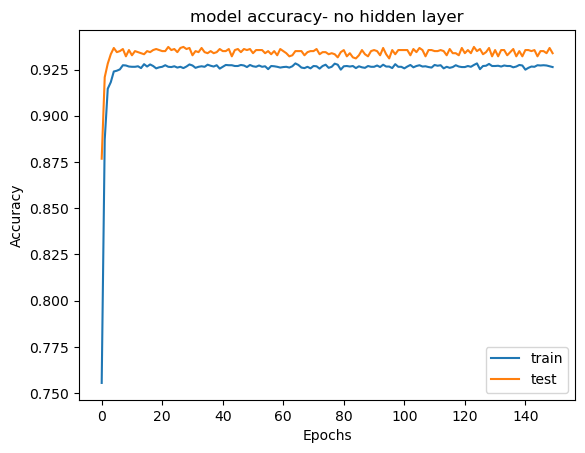

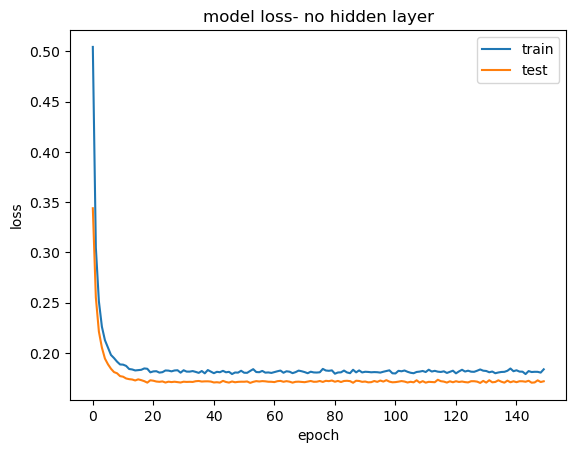

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9283 - loss: 0.1808
Test Accuracy: 92.49%


In [6]:
# Define Neural Network model architecture

model = tf.keras.models.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- no hidden layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- no hidden layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#### Lower complexity, decent performance, but the least accurate among the models.

## One hidden layer with 32 neurons

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

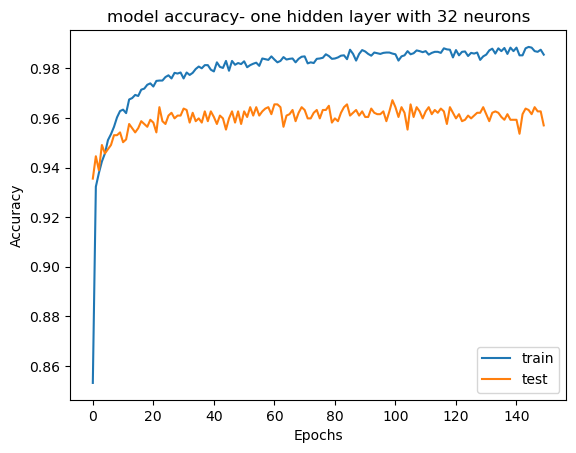

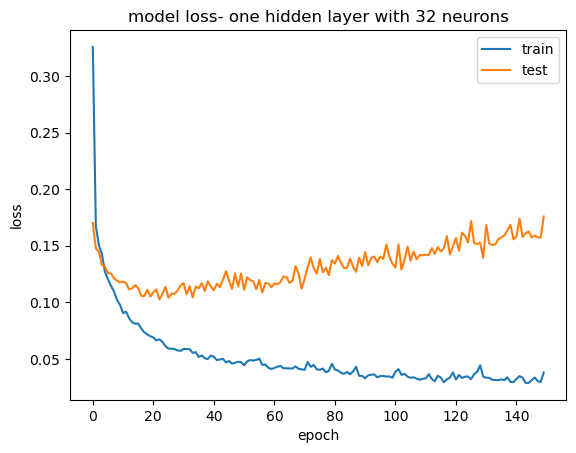

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9676 - loss: 0.1369
Test Accuracy: 96.29%


In [7]:
# Define Neural Network model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- one hidden layer with 32 neurons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- one hidden layer with 32 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#### Significant improvement in accuracy compared to no hidden layer, with reasonable loss.

## Two hiddens layer with 32 neurons in each

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081 (8.13 KB)

 Trainable params: 2,081 (8.13 KB)

 Non-trainable params: 0 (0.00 B)

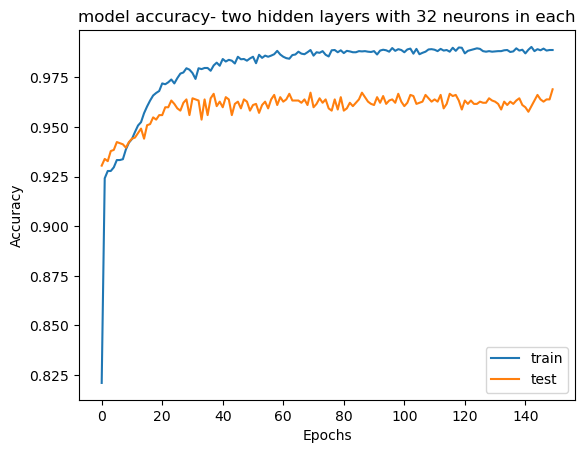

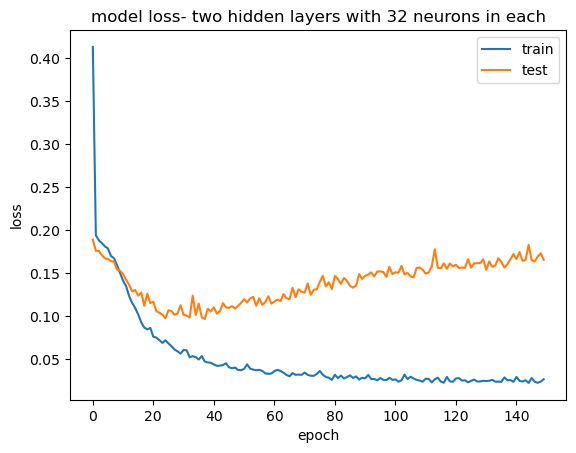

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1615
Test Accuracy: 96.11%


In [8]:
# Define Neural Network model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- two hidden layers with 32 neurons in each')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- two hidden layers with 32 neurons in each')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

####  Slightly lower accuracy than one hidden layer, marginally better loss, indicating potentially better generalization than one hidden layer but not by a significant margin.

## Three hidden layers with 32 neurons in each

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

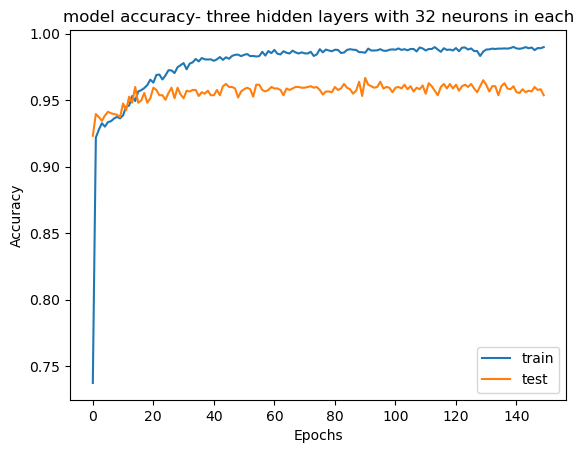

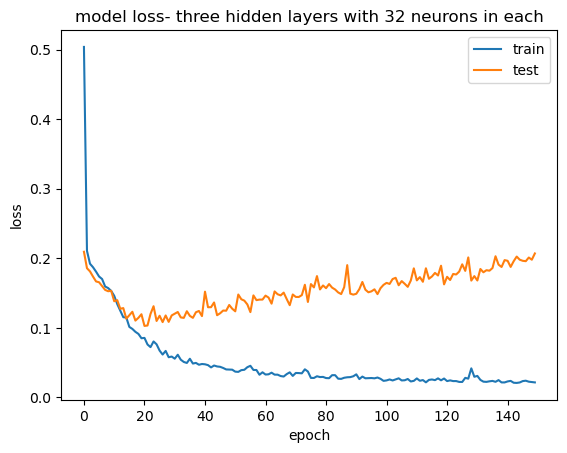

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9584 - loss: 0.1926
Test Accuracy: 95.25%


In [9]:
# Define Neural Network model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- three hidden layers with 32 neurons in each')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- three hidden layers with 32 neurons in each')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

####  Similar to two hidden layers but with slightly worse performance and increased complexity.

## One hidden layers with 96 neurons

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

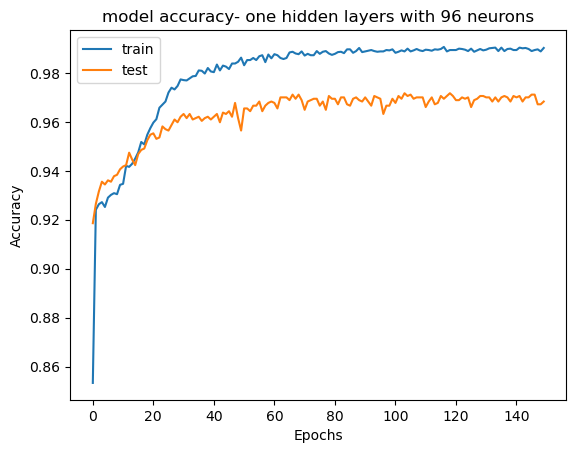

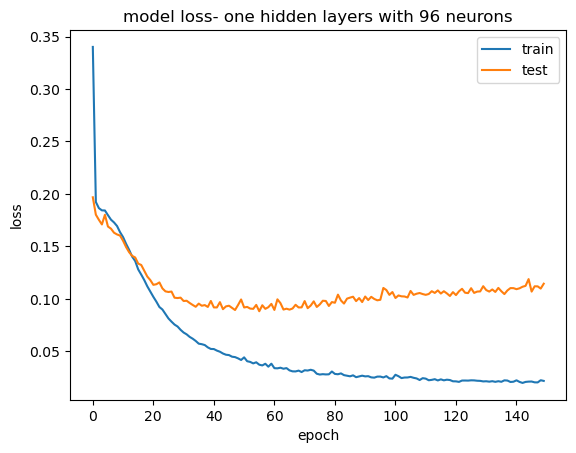

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9678 - loss: 0.1035
Test Accuracy: 96.52%


In [7]:
# Define Neural Network model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(96, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) 
model.summary()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- one hidden layers with 96 neurons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- one hidden layers with 96 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#### This model seems to provide the best balance between accuracy and loss, indicating both high performance and good generalization capabilities. It’s also simpler than the models with more layers. I will now do hyperparameter tuning for this model.

## Grid Search

In [13]:
# Function to create model, required for KerasClassifier
def create_model():

    # create model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(96, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid')) 

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Wrap the Keras model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0) 

batch_size = [50, 100, 150, 200, 250, 300]
epochs = [50, 100, 150, 200, 250, 300]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3) #3 fold cross validation
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.965400 using {'batch_size': 200, 'epochs': 150}
0.964156 (0.003781) with: {'batch_size': 50, 'epochs': 50}
0.961669 (0.000480) with: {'batch_size': 50, 'epochs': 100}
0.961217 (0.001119) with: {'batch_size': 50, 'epochs': 150}
0.961895 (0.003841) with: {'batch_size': 50, 'epochs': 200}
0.961669 (0.003369) with: {'batch_size': 50, 'epochs': 250}
0.960538 (0.002573) with: {'batch_size': 50, 'epochs': 300}
0.964609 (0.003304) with: {'batch_size': 100, 'epochs': 50}
0.962800 (0.000890) with: {'batch_size': 100, 'epochs': 100}
0.962573 (0.001844) with: {'batch_size': 100, 'epochs': 150}
0.961669 (0.002267) with: {'batch_size': 100, 'epochs': 200}
0.960199 (0.003186) with: {'batch_size': 100, 'epochs': 250}
0.960312 (0.002366) with: {'batch_size': 100, 'epochs': 300}
0.961556 (0.003760) with: {'batch_size': 150, 'epochs': 50}
0.963252 (0.001119) with: {'batch_size': 150, 'epochs': 100}
0.963252 (0.004036) with: {'batch_size': 150, 'epochs': 150}
0.963478 (0.000577) with: {'batch_size

#### Best: 0.965400 using {'batch_size': 200, 'epochs': 150}

## One hidden layers with 96 neurons with batch_size = 200, epochs = 150

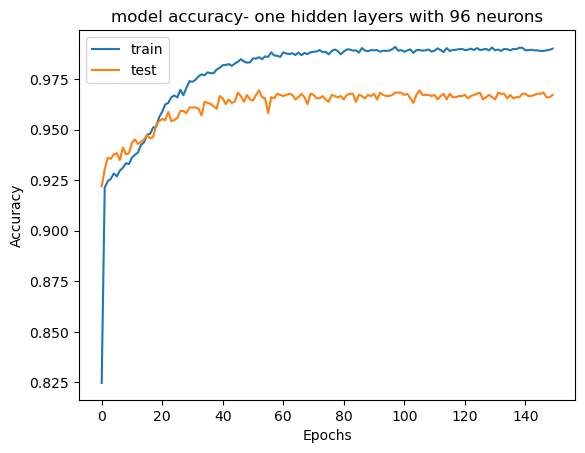

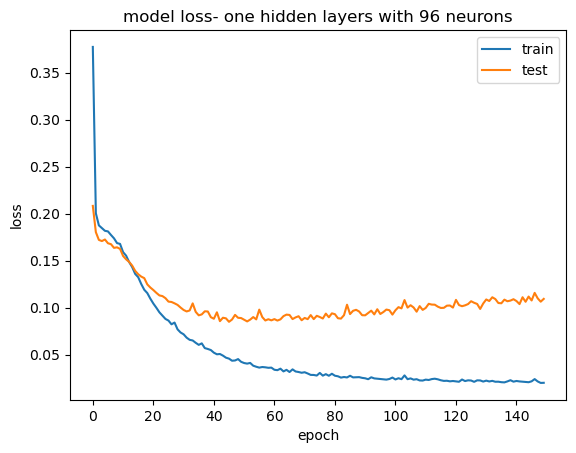

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9622 - loss: 0.1239
Test Accuracy: 95.97%


In [21]:
# Define Neural Network model architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(96, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) 

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
history= model.fit(X_train, y_train, batch_size=200, epochs=150, validation_split=0.2, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- one hidden layers with 96 neurons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss- one hidden layers with 96 neurons')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

#### This model now has high test accuracy of 96.61%, and even though it’s marginally better than that of the previous model, we will still consider this one as the best model.